<a href="https://colab.research.google.com/github/elmaazouziyassine/Machine_Learning_Python/blob/master/2_Classification/K-Nearest%20Neighbors%20(K-NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighbors (K-NN)**



### **Data Preprocessing**




In [0]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [15]:
# Import dataset
dataset = 'https://raw.githubusercontent.com/elmaazouziyassine/Machine_Learning_Python/master/datasets/social_network_ads.csv'
data = pd.read_csv(dataset)
data.head(10)

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [16]:
data.count()

UserID             400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [17]:
# Separate Features Variables from Target Variable
X = data.iloc[:, [2,3]].values  #analysis based only on the 2 indep variables Age & EstimaedSalary
y = data.iloc[:,-1].values
X, y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000],
        [    45,  22000],
        [    47,  49000],
        [    48,  41000],
        [    45,  22000],
        [    46,  23000],
        [    47,  20000],
        [    49,  28000],
        [    47,  30000],
        [    29,  43000],
        [    31,  18000],
        [    31,  74000],
        [    27, 137000],
        [    21,  16000],
        [    28,  44000],
        [    27,  90000],
        [    35,  27000],
        [    33,  28000],
        [    30,  49000],
        [   

In [18]:
# Split the Dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0) # 20% of data for test
X_test, y_test

(array([[    30,  87000],
        [    38,  50000],
        [    35,  75000],
        [    30,  79000],
        [    35,  50000],
        [    27,  20000],
        [    31,  15000],
        [    36, 144000],
        [    18,  68000],
        [    47,  43000],
        [    30,  49000],
        [    28,  55000],
        [    37,  55000],
        [    39,  77000],
        [    20,  86000],
        [    32, 117000],
        [    37,  77000],
        [    19,  85000],
        [    55, 130000],
        [    35,  22000],
        [    35,  47000],
        [    47, 144000],
        [    41,  51000],
        [    47, 105000],
        [    23,  28000],
        [    49, 141000],
        [    28,  87000],
        [    29,  80000],
        [    37,  62000],
        [    32,  86000],
        [    21,  88000],
        [    37,  79000],
        [    57,  60000],
        [    37,  53000],
        [    24,  58000],
        [    18,  52000],
        [    22,  81000],
        [    34,  43000],
        [   

In [19]:
# Apply Feature Scaling*
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)
X_train, X_test

(array([[ 0.58164944, -0.88670699],
        [-0.60673761,  1.46173768],
        [-0.01254409, -0.5677824 ],
        [-0.60673761,  1.89663484],
        [ 1.37390747, -1.40858358],
        [ 1.47293972,  0.99784738],
        [ 0.08648817, -0.79972756],
        [-0.01254409, -0.24885782],
        [-0.21060859, -0.5677824 ],
        [-0.21060859, -0.19087153],
        [-0.30964085, -1.29261101],
        [-0.30964085, -0.5677824 ],
        [ 0.38358493,  0.09905991],
        [ 0.8787462 , -0.59677555],
        [ 2.06713324, -1.17663843],
        [ 1.07681071, -0.13288524],
        [ 0.68068169,  1.78066227],
        [-0.70576986,  0.56295021],
        [ 0.77971394,  0.35999821],
        [ 0.8787462 , -0.53878926],
        [-1.20093113, -1.58254245],
        [ 2.1661655 ,  0.93986109],
        [-0.01254409,  1.22979253],
        [ 0.18552042,  1.08482681],
        [ 0.38358493, -0.48080297],
        [-0.30964085, -0.30684411],
        [ 0.97777845, -0.8287207 ],
        [ 0.97777845,  1.867

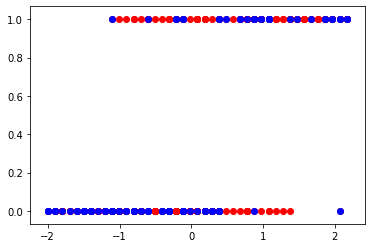

In [20]:
plt.scatter(X_train[:, 0], y_train, c = 'red')
plt.scatter(X_test[:, 0], y_test, c = 'blue')

### **Apply the model to the training dataset**



In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2) # p=2 for Euclidian Distance
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### **Predict test set results**

In [22]:
y_pred = classifier.predict(X_test)
y_test-y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0])

### **Visualize results**

Visualize the training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


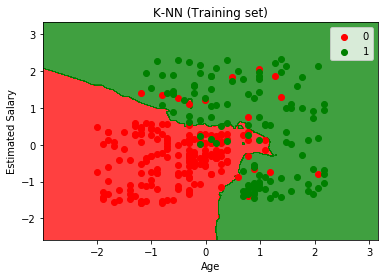

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


Visualize the test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


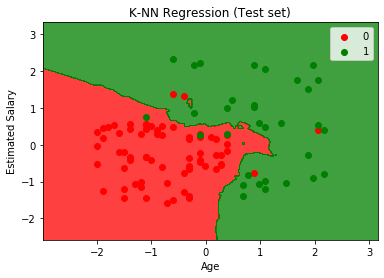

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### **Test the performance of the model**

Compute **Confusion Matrix** to evaluate the accuracy of a classification


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

65+29=94 correct predictions and 3+4=7è incorrect predictions.